# Algoritma K-Means

## Pengertian K-Means Clustering

K-Means Clustering merupakan salah satu metode dalam teknik pengelompokan (clustering) yang bertujuan untuk membagi data ke dalam beberapa kelompok (cluster) berdasarkan kemiripan karakteristiknya. Setiap kelompok dibentuk berdasarkan pusat cluster (centroid) yang merepresentasikan rata-rata posisi data dalam cluster tersebut. Data yang memiliki fitur serupa akan dikelompokkan dalam satu cluster, sedangkan data dengan karakteristik berbeda akan dimasukkan ke cluster lainnya.

## Manfaat Clustering

- Clustering sangat bermanfaat dalam berbagai bidang analisis data, seperti segmentasi pelanggan, perencanaan pemasaran, serta analisis zonasi wilayah berdasarkan pola tertentu.

- Diterapkan dalam banyak disiplin ilmu seperti computer vision dan pemrosesan citra untuk mengenali pola atau objek secara otomatis.

Clustering yang efektif akan menghasilkan kelompok data dengan tingkat kemiripan yang tinggi dalam satu cluster, namun rendah antar cluster. Kemiripan tersebut diukur secara numerik antara dua objek, dan akan bernilai tinggi jika objek tersebut memiliki banyak kesamaan. Semakin baik metode clustering yang digunakan, semakin akurat pula hasil pengelompokannya.

## Inertia (Sum Square error / SSE)

Dalam algoritma K-Means Clustering, inertia atau Sum of Squared Errors (SSE) digunakan sebagai ukuran untuk mengevaluasi kualitas hasil pengelompokan. Metrik ini menghitung total jarak kuadrat antara setiap titik data dan pusat klaster (centroid) tempat data tersebut berada. Semakin kecil nilai inertia, semakin baik pengelompokan karena data cenderung lebih dekat dengan pusat klasternya.

Rumus inertia dinyatakan sebagai:

$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

Penjelasan Notasi
- $x_i$: Titik data ke-$i$
- $\mu_{c_i}$: Centroid dari klaster tempat $x_i$ berada
- $\left\| x_i - \mu_{c_i} \right\|^2$: Jarak Euclidean kuadrat antara $x_i$ dan centroid-nya
- $n$: Jumlah total data

Nilai inertia yang rendah mengindikasikan bahwa anggota dalam satu klaster memiliki kesamaan yang tinggi dan berada dekat dengan pusat klasternya. Namun, nilai inertia tidak bisa digunakan sendirian untuk menentukan jumlah klaster terbaik—biasanya dipadukan dengan metode seperti Elbow Method.

## Silhouette Analysis


Silhouette Analysis adalah metrik evaluasi lain yang lebih baik dari inertia dalam banyak kasus untuk mengevaluasi hasil clustering, seperti pada K-Means, karena mempertimbangkan dua hal sekaligus yaitu:

- Kepadatan dalam klaster

- Jarak antar klaster

Silhouette Analysis mengukur seberapa mirip suatu titik data dengan klasternya sendiri dibandingkan dengan klaster terdekat lainnya. Rumusnya adalah:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Penjelasan Notasi:
- $a(i)$: Rata-rata jarak dari titik $i$ ke semua titik lain dalam klaster yang sama (cohesion)
- $b(i)$: Rata-rata jarak dari titik $i$ ke semua titik dalam klaster terdekat yang bukan miliknya (separation)
- $s(i)$: Skor silhouette untuk titik $i$, dengan nilai antara -1 dan 1

Nilai skor $s(i)$ ditafsirkan sebagai berikut:
- Jika $s(i) \approx 1$, maka titik berada jauh dari klaster lain dan cocok dengan klasternya
- Jika $s(i) \approx 0$, maka titik berada di antara dua klaster
- Jika $s(i) \approx -1$, maka titik bisa jadi salah masuk klaster

Untuk mengevaluasi seluruh hasil clustering, digunakan rata-rata dari semua $s(i)$:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

- $n$: Jumlah total data
- $S$: Silhouette score rata-rata seluruh data


## Implementasi dengan menggunakan data Iris

In [ ]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.6 MB/s eta 0:00:00


## Library yang digunakan

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
import psycopg2
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Pengumpulan Data

Kode ini nantinya berfungsi untuk mengambil data dari dua database yang berbeda, yaitu PostgreSQL dan MySQL. Data dari PostgreSQL diambil dari tabel nabila.postgres, sedangkan data dari MySQL diambil dari tabel irismysql. Setelah data dari kedua sumber dimuat ke dalam bentuk DataFrame menggunakan pustaka pandas, keduanya digabungkan berdasarkan kolom yang sama, yaitu id dan class, menggunakan metode inner join. Hasil akhirnya adalah tabel gabungan yang hanya menampilkan baris-baris yang memiliki nilai id dan class yang sama di kedua tabel, lalu ditampilkan ke layar tanpa menampilkan indeks baris.

In [ ]:
def get_pg_data():
    conn = psycopg2.connect(
        host="pg-382999bb-posgresqlpendataa.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_AwzON_kzF3kYXNu_CrZ",
        database="defaultdb",
        port=11188
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM nabila.postgres;")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-144b909e-mysqlll.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_aAig_mt_KOnGOnNKLDw",
        database="iris",
        port=17474
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa          14.0          2.0          50.1         30.5
  2     Iris-setosa          14.0          2.0          40.9         30.0
  3     Iris-setosa          13.0          2.0          40.7         30.2
  4     Iris-setosa          15.0          2.0          40.6         30.1
  5     Iris-setosa          14.0          2.0          50.0         30.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.4     

## Clustering pada data Iris menggunakan K-Means dengan jumlah cluster 2,3 dan 4

In [ ]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi clustering
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_
    accuracy = adjusted_rand_score(y, labels)

    print(f"\nHasil K-Means dengan {k} Klaster:")
    print(f"Centroids:\n{centroids}")
    print(f"Akurasi (Adjusted Rand Score): {accuracy:.3f}")

    return labels, centroids, accuracy

# 4. Jalankan clustering
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)


Hasil K-Means dengan 2 Klaster:
Centroids:
[[-0.2349652  -0.19808718 -0.25711389 -0.25878331]
 [ 3.28951274  2.77322056  3.59959446  3.62296633]]
Akurasi (Adjusted Rand Score): 0.003

Hasil K-Means dengan 3 Klaster:
Centroids:
[[-0.32632653 -0.32750871 -0.2904267  -0.26588017]
 [ 3.28951274  2.77322056  3.59959446  3.62296633]
 [ 2.23179089  3.29629394  0.64233207 -0.067168  ]]
Akurasi (Adjusted Rand Score): 0.002

Hasil K-Means dengan 4 Klaster:
Centroids:
[[-0.32632653 -0.32750871 -0.2904267  -0.26588017]
 [ 3.28752578  2.77721349  4.14265371  4.25851683]
 [ 2.23179089  3.29629394  0.64233207 -0.067168  ]
 [ 3.29149969  2.76922764  3.0565352   2.98741582]]
Akurasi (Adjusted Rand Score): 0.005


## Model Plotting dengan Jumlah Cluster 2, 3 dan 4

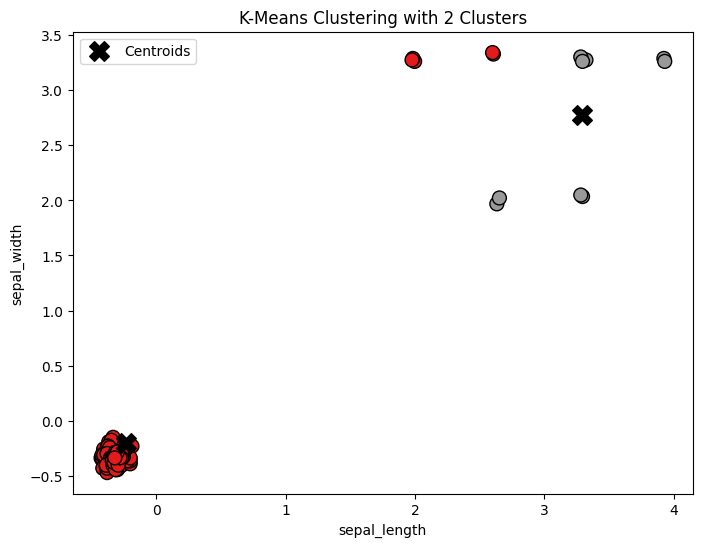

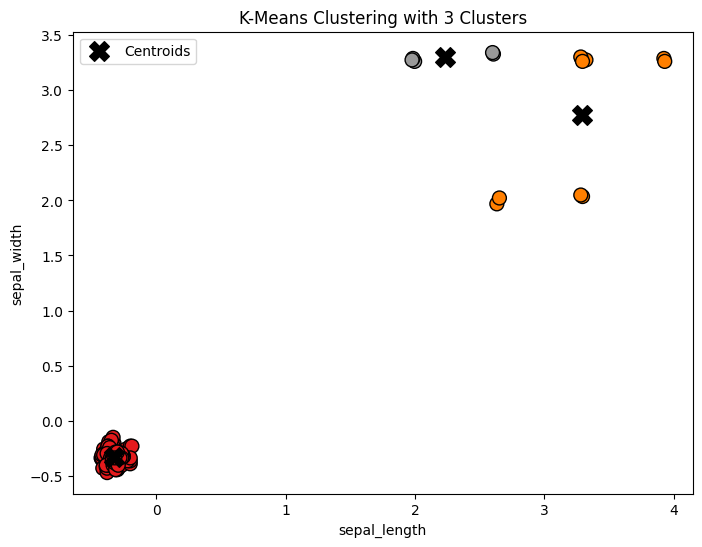

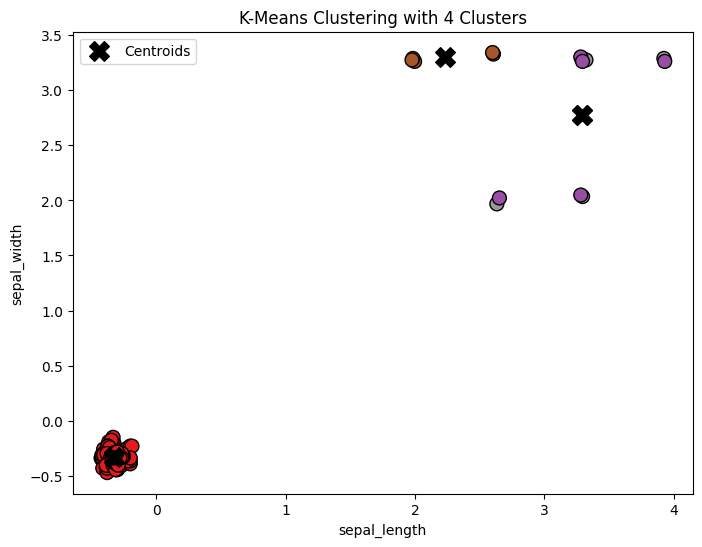

In [ ]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means, plotting dan menampilkan centroid
def perform_kmeans_plot(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Plotting data dan centroid
    plt.figure(figsize=(8, 6))

    # Scatter plot untuk 2 fitur pertama (sepal length & sepal width)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='Set1', marker='o', edgecolors='k', s=100)

    # Plot centroid dengan warna berbeda
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

    plt.title(f"K-Means Clustering with {k} Clusters")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.show()

# 4. Melakukan clustering dengan K=2, K=3, dan K=4 dan plot hasilnya
for k in [2, 3, 4]:
    perform_kmeans_plot(X_scaled, k)


## Menghitung Inertia untuk Jumlah Cluster 2,3 dan 4

In [ ]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk menghitung inertia secara manual
def calculate_inertia_step_by_step(X_scaled, labels, centroids):
    inertia = 0
    print("Langkah-langkah perhitungan Inertia:")

    for i in range(len(X_scaled)):
        cluster = labels[i]
        distance = np.linalg.norm(X_scaled[i] - centroids[cluster]) ** 2
        inertia += distance
        print(f"Titik data {i+1} (Fitur: {X_scaled[i]}), Klaster: {cluster}, "
              f"Centroid: {centroids[cluster]}, Jarak kuadrat: {distance:.3f}, "
              f"Inertia sementara: {inertia:.3f}")

    return inertia

# 4. Fungsi untuk menjalankan KMeans dan menghitung inertia manual
def perform_kmeans(X_scaled, y, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_

    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids (fitur hasil standarisasi):\n{centroids}")

    # Hitung inertia manual
    manual_inertia = calculate_inertia_step_by_step(X_scaled, labels, centroids)
    print(f"\nTotal Inertia Manual: {manual_inertia:.3f}")

    # Bandingkan dengan inertia dari sklearn
    sklearn_inertia = kmeans.inertia_
    print(f"Inertia dari sklearn: {sklearn_inertia:.3f}")
    print("="*50)

    return labels, centroids, manual_inertia

# 5. Jalankan untuk k=2, 3, dan 4
for k in [2, 3, 4]:
    perform_kmeans(X_scaled, y, k)



=== Hasil K-Means dengan 2 Klaster ===
Centroids (fitur hasil standarisasi):
[[-0.2349652  -0.19808718 -0.25711389 -0.25878331]
 [ 3.28951274  2.77322056  3.59959446  3.62296633]]
Langkah-langkah perhitungan Inertia:
Titik data 1 (Fitur: [ 2.60533824  3.3255754   0.64233207 -0.067168  ]), Klaster: 0, Centroid: [-0.2349652  -0.19808718 -0.25711389 -0.25878331], Jarak kuadrat: 21.329, Inertia sementara: 21.329
Titik data 2 (Fitur: [ 1.99600568  3.25902662  0.64233207 -0.067168  ]), Klaster: 0, Centroid: [-0.2349652  -0.19808718 -0.25711389 -0.25878331], Jarak kuadrat: 17.775, Inertia sementara: 39.104
Titik data 3 (Fitur: [ 1.98275932  3.28564613  0.55136737 -0.067168  ]), Klaster: 0, Centroid: [-0.2349652  -0.19808718 -0.25711389 -0.25878331], Jarak kuadrat: 17.745, Inertia sementara: 56.849
Titik data 4 (Fitur: [ 1.97613614  3.27233638  0.73329677 -0.067168  ]), Klaster: 0, Centroid: [-0.2349652  -0.19808718 -0.25711389 -0.25878331], Jarak kuadrat: 17.950, Inertia sementara: 74.799
Ti

## Model Plotting Diagram Elbow Method

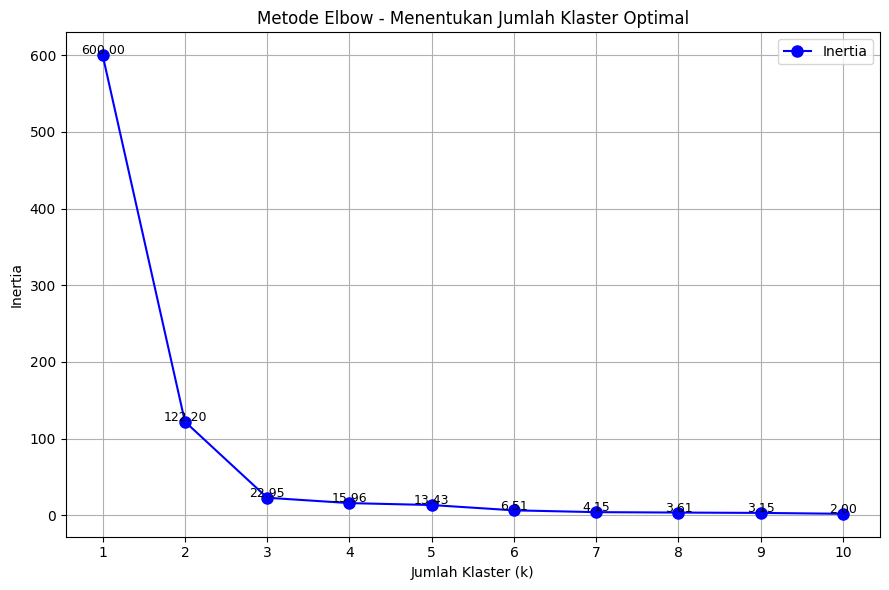

In [ ]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Hitung inertia untuk berbagai nilai k
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 4. Plot Elbow Diagram
plt.figure(figsize=(9, 6))
plt.plot(K_range, inertias, 'bo-', markersize=8, label='Inertia')
plt.title("Metode Elbow - Menentukan Jumlah Klaster Optimal")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia")
plt.xticks(K_range)
plt.grid(True)

# Tambahkan label inertia di tiap titik
for i, inertia in enumerate(inertias):
    plt.text(K_range[i], inertias[i] + 1, f"{inertia:.2f}", ha='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()

## Menghitung Silhouette Score untuk Jumlah Cluster 2,3 dan 4


=== Hasil K-Means dengan 2 Klaster ===
Centroids:
[[-0.2349652  -0.19808718 -0.25711389 -0.25878331]
 [ 3.28951274  2.77322056  3.59959446  3.62296633]]
Silhouette Score untuk 2 klaster: 0.898

=== Hasil K-Means dengan 3 Klaster ===
Centroids:
[[-0.32632653 -0.32750871 -0.2904267  -0.26588017]
 [ 3.28951274  2.77322056  3.59959446  3.62296633]
 [ 2.23179089  3.29629394  0.64233207 -0.067168  ]]
Silhouette Score untuk 3 klaster: 0.913

=== Hasil K-Means dengan 4 Klaster ===
Centroids:
[[-0.32632653 -0.32750871 -0.2904267  -0.26588017]
 [ 3.28752578  2.77721349  4.14265371  4.25851683]
 [ 2.23179089  3.29629394  0.64233207 -0.067168  ]
 [ 3.29149969  2.76922764  3.0565352   2.98741582]]
Silhouette Score untuk 4 klaster: 0.895

>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = 3 (dengan score = 0.913)


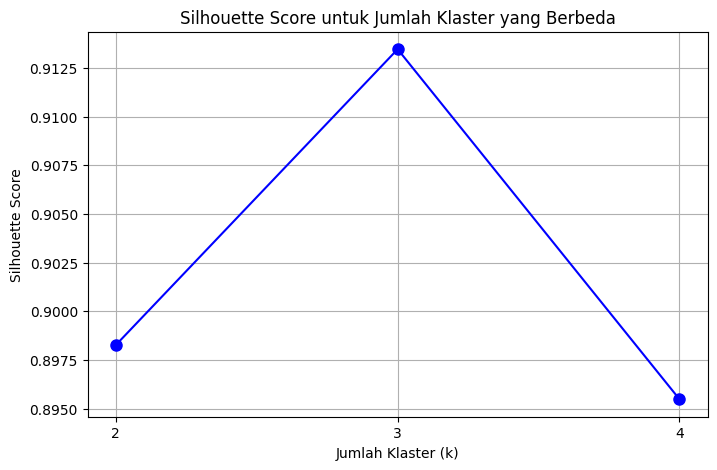

In [ ]:
# 1. Siapkan fitur (X) dan label (y)
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_merged[feature_names].values
y = df_merged['class'].astype('category').cat.codes.values  # label dikodekan ke angka

# 2. Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Fungsi untuk melakukan K-Means dan menghitung Silhouette Score
def perform_kmeans_with_silhouette(X_scaled, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Menghitung Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, labels)

    # Centroid dari masing-masing klaster
    centroids = kmeans.cluster_centers_

    # Output hasil untuk klaster k
    print(f"\n=== Hasil K-Means dengan {k} Klaster ===")
    print(f"Centroids:\n{centroids}")
    print(f"Silhouette Score untuk {k} klaster: {silhouette_avg:.3f}")

    return silhouette_avg

# 4. Melakukan clustering dan menghitung Silhouette Score untuk k=2, 3, dan 4
silhouette_scores = []
k_values = [2, 3, 4]

for k in k_values:
    score = perform_kmeans_with_silhouette(X_scaled, k)
    silhouette_scores.append(score)

# 5. Menentukan k dengan Silhouette Score terbaik
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"\n>>> Jumlah cluster terbaik dengan dengan Silhouette Score mendekati 1 adalah k = {best_k} (dengan score = {best_score:.3f})")

# 6. Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bo-', markersize=8)
plt.title("Silhouette Score untuk Jumlah Klaster yang Berbeda")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)
plt.show()